# Classification Assignment
In this lecture you will learn to work with a larger dataset.

You will be doing the following things:

<br>1) Get a brief introduction to classification, a specific type of predictive analytics
<br>2) Using data preprocessing tools (check for missing data, handle missing data, check the data types, encode columns).
<br>3) Explore the data with descriptive statistical tools.


### Introduction
Classification is a specific type of machine learning problem where we take a lot of input data (referred to as features) of an observation (one row in your dataframe) in order to predict something about the observation. This something is a decired target (also referred to as label). In a nutshell, we throw this data into a machine learning algorithm (we will import a machine learning library), which in turn will look for patterns that describes the relationship between the input and output data. Based on this, the machine learning algorithm will return a generic model to us, which we can use for predictions in the future.

<br> In this assignment we are going to predict if it will rain in Australia the next day, based on various characteristics (features) that can be measured the previous day. Having collected a lot of historical data over many days, we can find such a relationship. Ideally, if we develop a good model we can predict Australia's weather tomorrow prospectively.

<br> The "RainTomorrow" column is the so-called label. The "Date" column is simply an index. The other columns are the so-called features.

### Assignment 1.0
Import Pandas, import the CSV <b>'weather_aus.csv'</b> file and print the first couple of rows. Take a couple of minutes to look at the columns and their values in order to become one with the data.

<details><summary>Hint 1</summary>
    <p>
        Pandas has a <b>read_csv</b> method
    </p>
</details>
<details><summary>Hint 2</summary>
    <p>
        Pandas has a <b>head()</b> method to print the first rows
    </p>
</details>

In [20]:
#Let's import the libraries and look into the data at hand
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('weather_aus.csv')

In [22]:
df.head(100)
df.shape

(142193, 23)

In [23]:
df['Location'].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


### Assignment 1.1
Print the number of rows and columns. Additionally, find the mean and standard deviation of all the columns.

<details><summary>Hint 1</summary>
    <p>
        Pandas has a method called describe()
    </p>
</details>

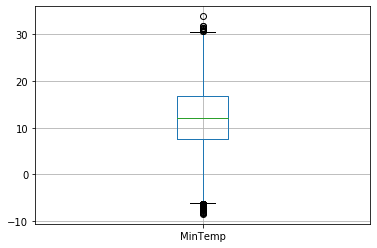

In [30]:
df.boxplot("MinTemp")

In [6]:
df.shape

(142193, 23)

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


### Assignment 1.2
By now we can see a couple of rows have some values called "NaN". This means that there is no actual value (<b>nulls</b>, a very important topic in computer science); it was missing in the dataset before we imported it. Missing values are very common, but having a lot of them can decrease performance. Find the number of missing values in the dataframe.

<details><summary>Hint 1</summary>
    <p>
        Pandas has a method called isnull(). This returns True or False based on whether the value was null.
    </p>
</details>

<details><summary>Hint 2</summary>
    <p>
        True and False values amounts to 1 and 0, respectively, when you try to sum them up.
    </p>
</details>

In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

### Assignment 1.3
Find the fraction of missing values in the dataframe

<details><summary>Hint 1</summary>
    <p>
        You can use isnull() on a DataFrame
    </p>
</details>

In [10]:
print('Fraction of missing values in %')
df.isnull().mean() * 100 

Fraction of missing values in %


Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64

### Assignment 1.4
We can see that the <b>Sunshine</b> column has the highest fraction of nulls. In fact, all the values are missing. The machine learning algorithm will not be able to learn any patterns from this, whereas we may remove the column right away. Do that.

<details><summary>Hint 1</summary>
    <p>
        DataFrame has a method called <b>drop.</b>. Axis must be = 1, as we are dropping columns not rows.
    </p>
</details>

In [11]:
df = df.drop('Sunshine', axis=1)

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Assignment 1.5
As explained earlier, we will use the features to predict the label (i.e. the columns to predict RainTomorrow). Often, as well as for this dataset, we can have some metadata in our dataset that does not have any explanatory power per se (it does't help us predict the label) but it may still be useful to us. The Date column is an example of this. Another example can be a customer ID. If we assume that our classification model can predict RainTomorrow for any day, it is not important to look for patterns between the individual date for an observation and the label. Although, the column may still be useful for us. Long story short, we do not need to transform the Date column, but we can use it as an index in the DataFrame to seperate it from the remaining features.

<b>Set the Date column as an index!</b>

<br> <details><summary>Hint 1</summary>
    <p>
        Dataframe has a method called set_index()
    </p>
</details>

In [13]:
df = df.set_index('Date')

In [14]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Assignment 1.6.1

XGBoost is a very popular machine learning algorithm used for tabular data (the kind of data we are working with). A standard XGBoost algorithm cannot fit a prediction model with columns that are not numeric (e.g. WindGustDir). We shall now dive into this.

<b>Check the data types of all features in the Dataframe</b>

<br> <details><summary>Hint 1</summary>
    <p>
        Dataframe has an attribute called dtypes.
    </p>
</details>

In [15]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Assignment 1.6.3

All non-object types are not necessarily continuous; there can for instance be binary columns (e.g. RainToday).
<br><br><b>Create a list containing strings with the columns that are of type object: Call the list "cat_list". 
Create another list for the non-objects: Call the list "num_list".</b>

<br> <details><summary>Hint 1</summary>
    <p>
        Your can either do it manually, make a loop or some other sneaky idea.
    </p>
</details>

In [16]:
for col in df.dtypes:
    print(col)

object
float64
float64
float64
float64
object
float64
object
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object


In [17]:
# Categorical boolean mask
cat_feature_mask = df.dtypes == object
num_feature_mask = df.dtypes != object

# filter categorical columns using the mask and turn it into a list
cat_list = df.columns[cat_feature_mask].tolist()
num_list = df.columns[num_feature_mask].tolist()

cat_list
num_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [18]:
df.head(100)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-03-07,Albury,8.3,27.9,0.0,NaN,W,37.0,S,W,4.0,...,58.0,22.0,1015.2,1012.4,NaN,NaN,13.3,27.0,No,No
2009-03-08,Albury,11.0,30.2,0.0,NaN,SSE,24.0,E,SSE,7.0,...,54.0,20.0,1017.0,1014.7,NaN,NaN,17.6,28.8,No,No
2009-03-09,Albury,13.8,31.8,0.0,NaN,NNE,24.0,SSE,NE,6.0,...,49.0,28.0,1019.7,1015.9,NaN,NaN,18.6,30.5,No,No


### Assignment 1.6.4

In order to encode the categorical values, we need to make an active decision on what to do with the null values. Handling missing data is a large topic in itself, but we will simply <i>impute</i> all the missing categorical values with the string <b>'missing'</b>. Fill the numeric values with <b>0</b>.

<br><b>Impute the categorical columns with the string 'missing'</b>

<br> <details><summary>Hint 1</summary>
    <p>
        Dataframe has a method called fillna() for this purpose. Remember to specify the columns you intend to run this operation on.
    </p>
</details>

In [19]:
#The columns expect different datatypes whereas we impute them with different numbers
df[cat_list] = df[cat_list].fillna('missing')
df[num_list] = df[num_list].fillna(0)

df.head(1000)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,0.0,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,0.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-10-05,Albury,5.6,17.8,0.0,0.0,ENE,19.0,SE,SSE,4.0,...,89.0,59.0,1020.5,1016.4,0.0,0.0,10.2,17.4,No,No
2011-10-06,Albury,10.2,16.0,0.0,0.0,SW,13.0,S,S,9.0,...,87.0,80.0,1014.8,1012.6,0.0,8.0,13.0,15.0,No,Yes
2011-10-07,Albury,11.1,21.4,4.2,0.0,W,41.0,S,WSW,7.0,...,88.0,53.0,1013.2,1010.1,0.0,0.0,13.3,19.9,Yes,No


### Assignment 1.6.5

Before we can hand the data to the machine learning algorithm, we shall transform categorical columns. For this, we can use an OrdinalEncoder provided by the library Scikit Learn (there are several encoders that will do the job). An ordinal encoder simply maps all the categories into numeric values.

<br><b>Import the OrdinalEncoder from sklearn and apply it for the categorical features </b>

Find the documentation for OrdinalEncoder [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

<br> <details><summary>Hint 1</summary>
    <p>
        The encoder has a method called fit_transform(). It takes a dataframe as an input, and will spit out the transformed dataframe. Remember to specify the columns you need to transform (you have a list for this).
    </p>
</details>

In [20]:
from sklearn.preprocessing import OrdinalEncoder

#Instantiating the Ordinal Encoder
enc = OrdinalEncoder()

df[cat_list] = enc.fit_transform(df[cat_list])

df[cat_list]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Date,,,,,,
2008-12-01,2.0,13.0,13.0,14.0,0.0,0.0
2008-12-02,2.0,14.0,6.0,15.0,0.0,0.0
2008-12-03,2.0,15.0,13.0,15.0,0.0,0.0
2008-12-04,2.0,4.0,9.0,0.0,0.0,0.0
2008-12-05,2.0,13.0,1.0,7.0,0.0,0.0
...,...,...,...,...,...,...
2017-06-20,41.0,0.0,2.0,0.0,0.0,0.0
2017-06-21,41.0,0.0,9.0,1.0,0.0,0.0
2017-06-22,41.0,6.0,9.0,3.0,0.0,0.0


### Assignment 1.7.1

One of the most important topics in machine learning, is the training and test split. Luckily it is not very complex to understand. As we talked about earlier, we train our model on data that we already have in order to make some predictions on data where we miss the label. Again, we know whether it was raining yesterday but we cannot be certain of tomorrow; we can only predict it. As we can never be certain we at least want to know how accuracte we are in this prediction. To figure this out, we will set aside some of the data we already have, in order to test how well our model performs on this data. This is called the training and test split. While there is no golden rule, it is common to use 75% of the data for training and 25% of the data for testing.

<br><b>First, split the dataframe into two: one that contains the label (RainTomorrow) and one that contains all the features</b>

<br> <details><summary>Hint 1</summary>
    <p>
        Dataframe has a drop() method to remove a column.
    </p>
</details>

In [21]:
y = df['RainTomorrow']

X = df.drop(['RainTomorrow'],axis=1)

### Assignment 1.7.2

<br><b>Split the data into X_train, X_test, y_train, y_test. Use Scikit Learn's train_test_split function for this. 75% of the observations for training and 25% for test</b>

Find the documentation for train_test_split [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

<br> <details><summary>Hint 1</summary>
    <p>
      Look at the documentation ;-)
    </p>
</details>

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

### Assignment 1.8

Le grand final: Build a prediction model with XGBoost. To do this, you must: <br><b>1) Import xgboost. <br>2) Initialise an object of class XGBClassifier. <br>3) Use the method fit() of the object you just created. Giv the object your two training dataframes (the dataframe for features and the dataframe for labels). The fit method will look for patterns in your data, and this may take a few minutes, depending on your hardware. <br>4) Call method predict() on the object, and give the method your dataframe with test features as a parameter. Assign this statement to a variable called 'predictions' (these are your predictions for the test set).</b>

In [23]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(X_train,y_train)

predictions = xgb.predict(X_test)

### Assignment 1.9.1

Try to test how your model performed using the accuracy function from below (you may have to insert your own variable names)...... How can we tell whether the accuracy is good or bad? We may look a bit more into this in the next lecture.

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8592365467383049

### Assignment 1.9.2

With the code snippet below you can see the most informative features (the features that XGBoost used the most for its predictions). Ideally, we can get rid of the features that was never used.

In [25]:
xgb.get_booster().get_fscore()

{'Humidity3pm': 440,
 'RainToday': 37,
 'Cloud3pm': 142,
 'Pressure3pm': 458,
 'WindGustSpeed': 300,
 'Rainfall': 239,
 'Evaporation': 215,
 'Location': 400,
 'Temp3pm': 273,
 'Temp9am': 311,
 'MinTemp': 366,
 'WindGustDir': 241,
 'Humidity9am': 306,
 'WindDir3pm': 235,
 'Pressure9am': 307,
 'WindSpeed3pm': 248,
 'Cloud9am': 120,
 'MaxTemp': 326,
 'WindDir9am': 202,
 'WindSpeed9am': 176}